In [1]:
import os

%load_ext autoreload
%autoreload 2

""""
Devo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of
each class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.

Here collecting methods and quick analyses
"""

'"\nDevo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of\neach class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.\n\nHere collecting methods and quick analyses\n'

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper

DFallpa = load_handsaved_wrapper()


In [4]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,trial,03_samp,M1,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(54, 731, 160)"
1,trial,03_samp,PMv,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(61, 731, 160)"
2,trial,03_samp,PMd,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(48, 731, 160)"
3,trial,03_samp,dlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(28, 731, 160)"
4,trial,03_samp,vlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 731, 160)"
5,trial,03_samp,FP,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(57, 731, 160)"
6,trial,03_samp,SMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(56, 731, 160)"
7,trial,03_samp,preSMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(56, 731, 160)"
8,trial,05_first_raise,M1,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(54, 731, 160)"
9,trial,05_first_raise,PMv,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(61, 731, 160)"


# Preprocessing

### FR Normalization

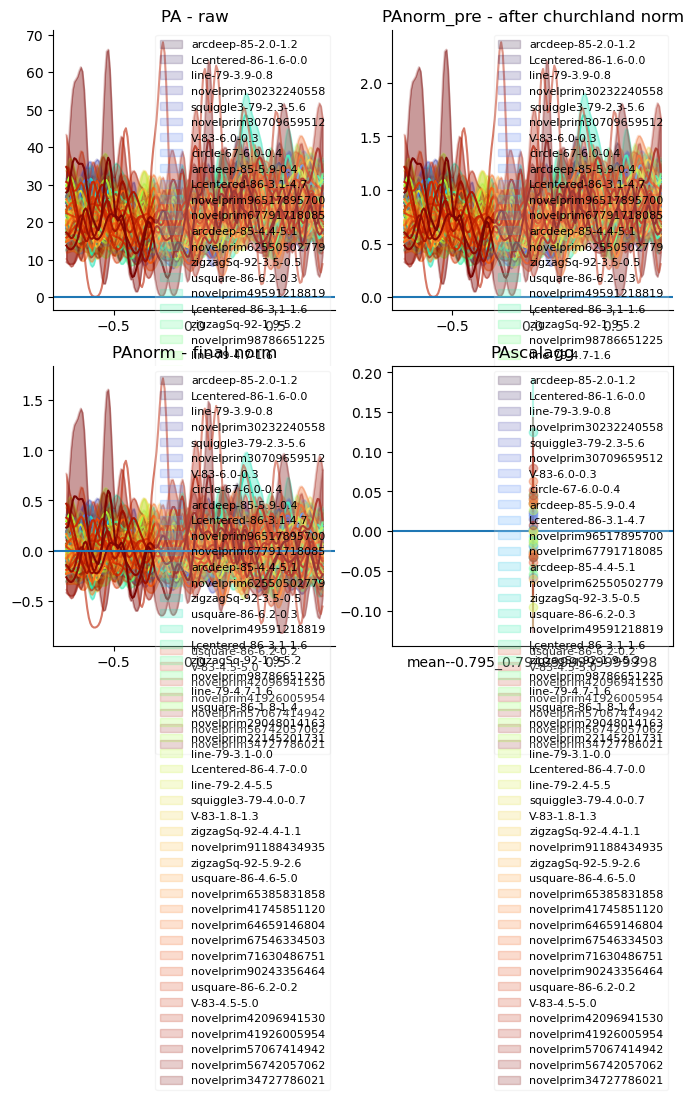

In [5]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
fr_normalization_method = "each_time_bin"
# fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

### Factorize all relevant labels FIRST here.


In [6]:
if False: # Ingore this for now
    from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
    MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

### [Optional, for testing] Prune DFallPa to what you want to analyze

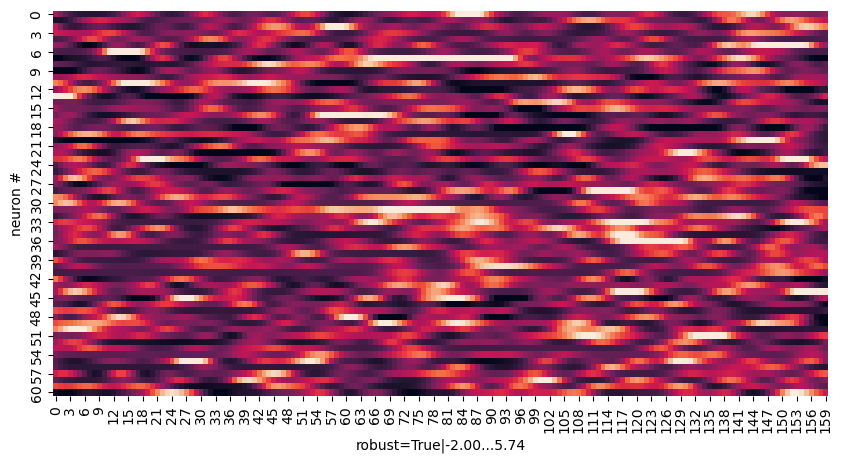

In [7]:
bregions = ["PMv"]
events = ["03_samp"]

DFallpa = DFallpa[(DFallpa["bregion"].isin(bregions)) & (DFallpa["event"].isin(events))].reset_index(drop=True)
pa =DFallpa["pa"].values[0]
pa.plotNeurHeat(trial=100)



##### Extract a single PA for testing.


In [8]:

pa = DFallpa["pa"].values[0]



In [9]:
##### Extract data for pre-samp and post-samp
var = "seqc_0_shape" # Decoded variable

(731, 61)
731
(1462, 61)
1462


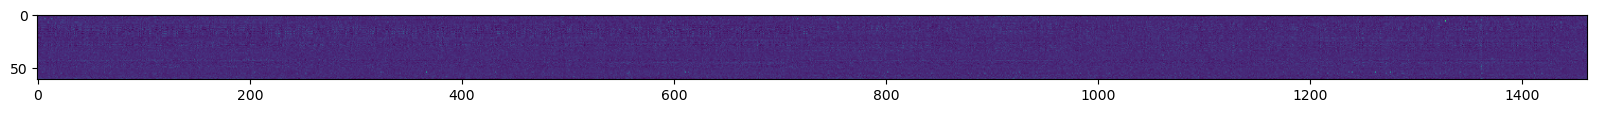

In [10]:
twind = [0.1, 0.7]
pathis = pa.slice_by_dim_values_wrapper("times", twind)
pathis = pathis.agg_wrapper("times")

# Also make test data that is pre-samp
twind = [-0.7, -0.1]
pathis_presamp = pa.slice_by_dim_values_wrapper("times", twind)
pathis_presamp = pathis_presamp.agg_wrapper("times")

X = pathis.X.squeeze().T # (ntrials, nchans)
X_presamp = pathis_presamp.X.squeeze().T
times = pa.Times
dflab = pa.Xlabels["trials"]
labels = dflab[var].tolist()
print(X.shape)
print(len(labels))
# Stack presamp (label="presamp") and postsamp (label="shape X")
# And add a label (pre-samp) by concatenating to post-samp data
import numpy as np
X = np.concatenate([X, X_presamp], axis=0)
_labels = ["presamp" for _ in range(X_presamp.shape[0])]
labels += _labels
# Plot data
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(X.T)

print(X.shape)
print(len(labels))

In [11]:
from neuralmonkey.analyses.decode_good import decode_train_model
from sklearn.linear_model import LogisticRegression
from neuralmonkey.analyses.decode_good import decode_train_model
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


##### BAD - testing

In [12]:
if False:
    # Train decoders

    mod = decode_train_model(X, labels, do_center=True)

    clf = LogisticRegression().fit(X, labels)


    clf.predict(X[:2, :])

    clf.predict_log_proba(X).shape
    clf.predict_proba(X).shape
    clf.classes_
    np.sum(clf.predict_proba(X), axis=1)

    clf = OneVsRestClassifier(LogisticRegression()).fit(X, labels)



##### GOOD - multi-label classificatin

In [13]:
# (1) Convert labels (shape strings) into one-hot labels
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# convert to list of tuples
labels_tuples = [tuple([x]) for x in labels]

# Return array of one-hots 
labels_mlb = mlb.fit_transform(labels_tuples)

for x, y in zip(labels, labels_mlb):
    print(x, y)

# These are the classes
print("Classes, in order: ", mlb.classes_)

arcdeep-85-2.0-1.2 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
Lcentered-86-1.6-0.0 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
line-79-3.9-0.8 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
arcdeep-85-2.0-1.2 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
arcdeep-85-2.0-1.2 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
novelprim302322405581-125-4.6-0.1 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
squiggle3-79-2.3-5.6 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0]
novelprim307096595122-125-3.3-1.5 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
V-83-6.0-0.3 [0 0 0 0 0 0 1 0 0 0 0 0 0 0

In [14]:
# (2) Fit classifier

import numpy as np
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC

clf = OneVsRestClassifier(LogisticRegression()).fit(X, labels_mlb)
np.max(clf.predict_proba(X), axis=1)


array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

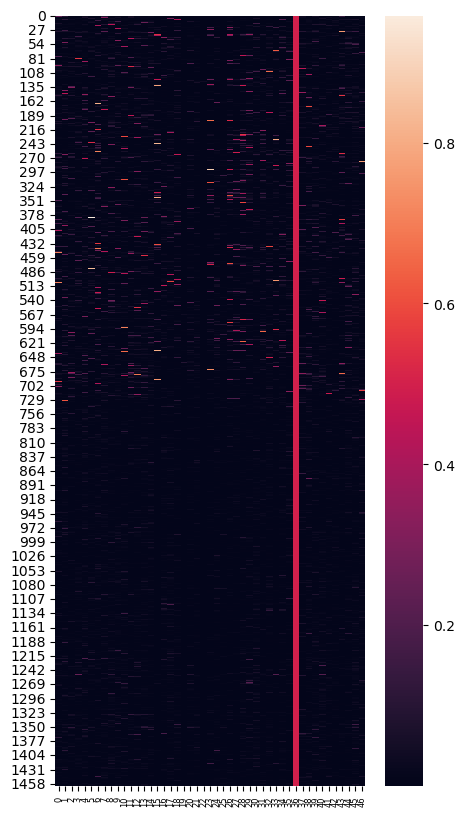

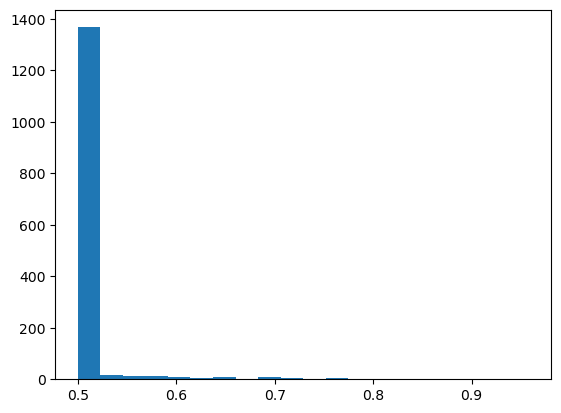

In [15]:
# Plot probabilites
probs = clf.predict_proba(X)
from pythonlib.tools.snstools import heatmap_mat
fig, ax = plt.subplots(figsize=(5, 10))
heatmap_mat(probs, ax = ax, annotate_heatmap=False);

fig, ax = plt.subplots()
probs_max = np.max(probs, axis=1)
ax.hist(probs_max, bins=20);


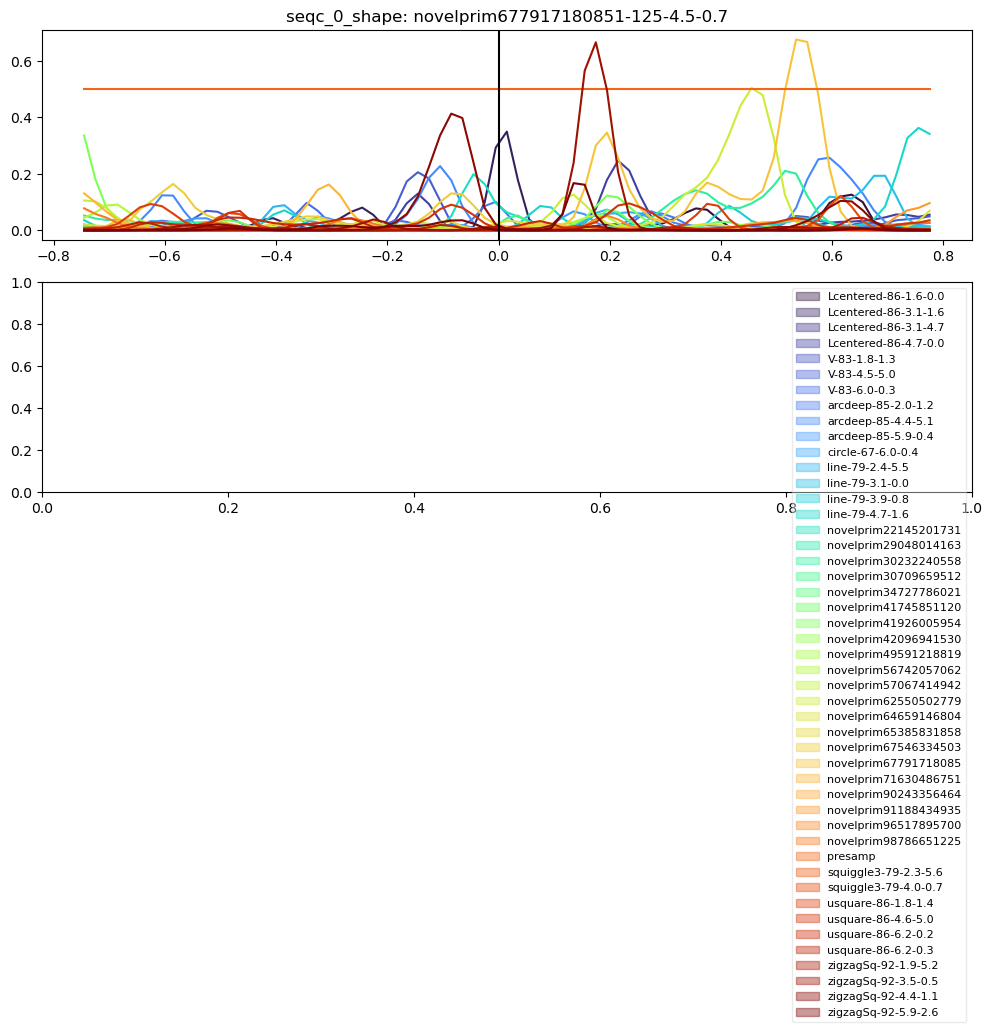

In [16]:
# (3) Plot timecourse of decode for an example trial
trial = 207

dur = 0.1 # Use >=0.1 to avoid high noisiness
slide = 0.02
pathis = pa.agg_by_time_windows_binned(dur, slide)
from pythonlib.tools.plottools import legend_add_manual, makeColors

pcols = makeColors(len(mlb.classes_))

map_lab_to_col = {}
for cl, col in zip(mlb.classes_, pcols):
    map_lab_to_col[cl] = col
if False:
    # Color by novelty
    dflab[dflab["shape_is_novel_all"]==True].index.tolist()
    pcols = makeColors(3)

    map_lab_to_col = {}
    for sh, nov in dflab.loc[:, ["seqc_0_shape", "shape_is_novel_all"]].values:
        if nov:
            pcolthis =  pcols[0]
        else:
            pcolthis = pcols[1]
        
        if sh not in map_lab_to_col:
            map_lab_to_col[sh] = pcolthis
        else:
            assert np.all(map_lab_to_col[sh] == pcolthis)

    map_lab_to_col["presamp"] = pcols[2]
# Plot timecourse of decode


x = pathis.X[:, trial, :].T # (ntimes, nchans)
probs_mat = clf.predict_proba(x) # (ntimes, nlabels)
times = pathis.Times

fig, axes = plt.subplots(2,1, figsize=(12, 6))

ax = axes.flatten()[0]
for i, lab in enumerate(mlb.classes_):
    probs = probs_mat[:, i]
    col = map_lab_to_col[lab]
    ax.plot(times, probs, label=lab, color=col)
ax.axvline(0, color="k")

title = pa.Xlabels["trials"].iloc[trial]["seqc_0_shape"]
ax.set_title(f"seqc_0_shape: {title}")

# ax.legend(loc="best")

ax = axes.flatten()[1]
legend_add_manual(ax, map_lab_to_col.keys(), map_lab_to_col.values())


##### Get a single scalar score (by averaging the decode across time bins)


In [17]:
# Return array (ntrials, ndecodeclasses, ntwinds)

In [18]:

dur = 0.15 # Use >=0.1 to avoid high noisiness
slide = 0.025
pathis = pa.agg_by_time_windows_binned(dur, slide)

list_twind = [
    [-0.7, -0.1],
    [0.1, 0.7],
]

ntrials = len(pathis.Trials)
nclass = clf.n_classes_
ntwind = len(list_twind)
res = np.zeros((ntrials, nclass, ntwind))-1 # -1, so can sanity check that all filled


for ind_trial in range(len(pathis.Trials)):

    x = pathis.X[:, ind_trial, :].T # (ntimes, nchans)
    probs_mat = clf.predict_proba(x) # (ntimes, nlabels)
    times = pathis.Times

    times.shape
    probs_mat.shape

    for ind_twind, twind in enumerate(list_twind):
        inds = (times>=twind[0]) & (times<=twind[1])
        probs_vec = np.mean(probs_mat[inds, :], axis=0)

        assert np.all(res[ind_trial, :, ind_twind]<0), "already filled..."
        res[ind_trial, :, ind_twind] = probs_vec
        # res.append(probs_vec)
assert np.all(res>0), "did not fill up res..."

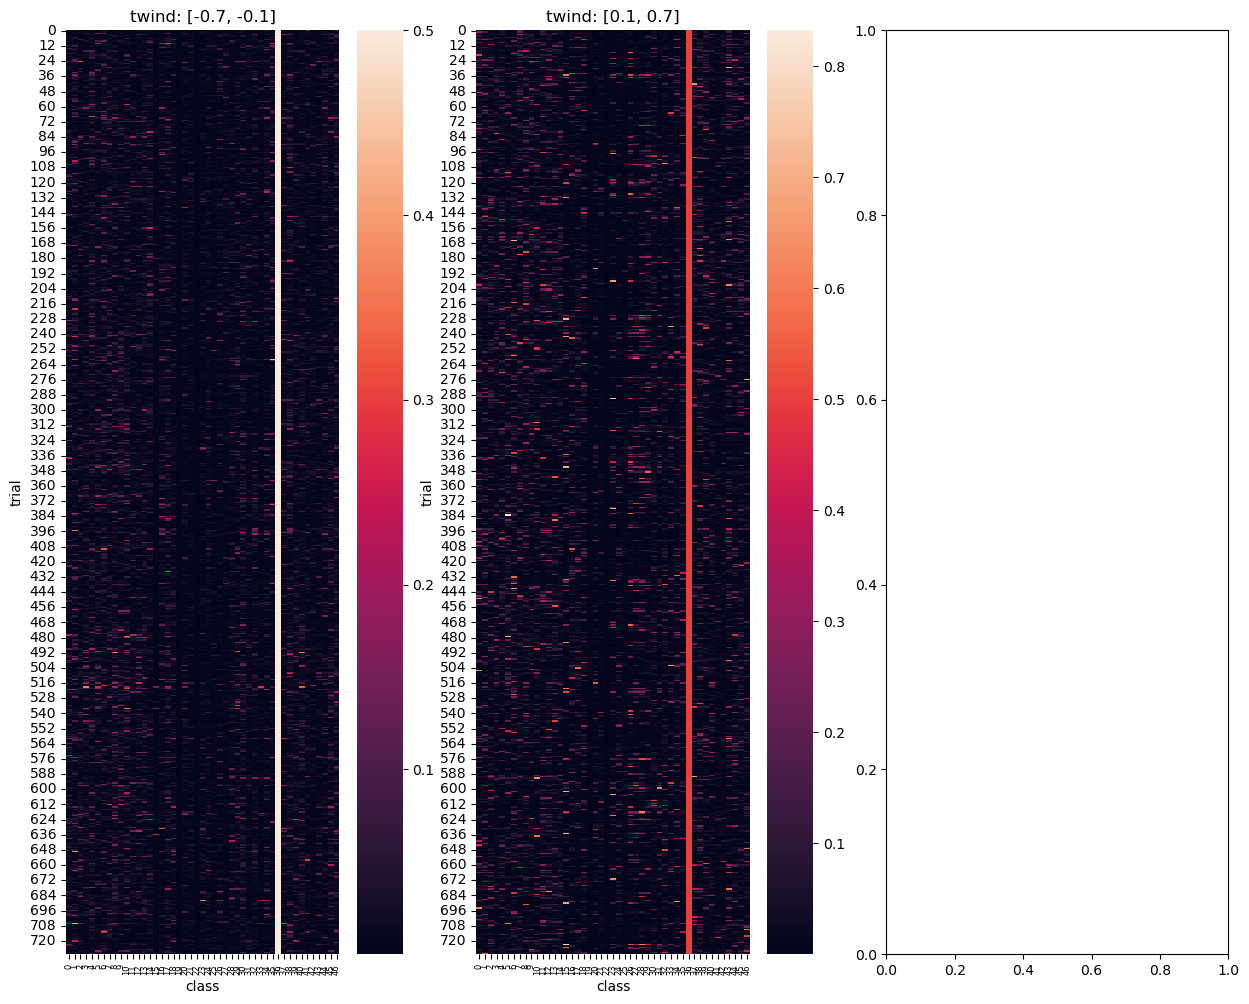

In [19]:
# Plot results

from pythonlib.tools.snstools import heatmap_mat

ind_twind = 0

ncols = 3
nrows = int(np.ceil(len(list_twind)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*12))

for ax, ind_twind in zip(axes.flatten(), range(len(list_twind))):
    heatmap_mat(res[:, :, ind_twind], ax, False)    
    ax.set_xlabel("class")
    ax.set_ylabel("trial")
    ax.set_title(f"twind: {list_twind[ind_twind]}")



##### Average the decode over trials, to return a single row per trial class

In [20]:
# Returns array: (ntrial classes, n decode clasess, ntwinds)

In [21]:
vars_trial = ["seqc_0_shape"]
dflab = pathis.Xlabels["trials"]
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
grpdict = grouping_append_and_return_inner_items_good(dflab, vars_trial, sort_keys=True)


n_trial_classes = len(grpdict)
n_decode_classes = res.shape[1]
n_twind = res.shape[2]
resthis = np.zeros((n_trial_classes, n_decode_classes, n_twind)) - 1

for ind_twind in range(n_twind):
    for ind_trialclass, (grp, inds) in enumerate(grpdict.items()):
        print(ind_twind, grp)

        prob_vec = np.mean(res[inds, :, ind_twind], axis=0)

        resthis[ind_trialclass, :, ind_twind] = prob_vec

assert np.all(resthis>=0)


0 ('Lcentered-86-1.6-0.0',)
0 ('Lcentered-86-3.1-1.6',)
0 ('Lcentered-86-3.1-4.7',)
0 ('Lcentered-86-4.7-0.0',)
0 ('V-83-1.8-1.3',)
0 ('V-83-4.5-5.0',)
0 ('V-83-6.0-0.3',)
0 ('arcdeep-85-2.0-1.2',)
0 ('arcdeep-85-4.4-5.1',)
0 ('arcdeep-85-5.9-0.4',)
0 ('circle-67-6.0-0.4',)
0 ('line-79-2.4-5.5',)
0 ('line-79-3.1-0.0',)
0 ('line-79-3.9-0.8',)
0 ('line-79-4.7-1.6',)
0 ('novelprim221452017317-91-5.3-1.4',)
0 ('novelprim290480141634-125-4.1-0.1',)
0 ('novelprim302322405581-125-4.6-0.1',)
0 ('novelprim307096595122-125-3.3-1.5',)
0 ('novelprim347277860216-130-4.9-0.9',)
0 ('novelprim417458511209-102-4.5-2.3',)
0 ('novelprim419260059546-115-3.8-2.3',)
0 ('novelprim420969415309-102-3.4-1.7',)
0 ('novelprim495912188195-130-4.6-2.2',)
0 ('novelprim567420570629-90-3.4-0.9',)
0 ('novelprim570674149421-115-3.3-2.2',)
0 ('novelprim625505027794-130-5.3-1.5',)
0 ('novelprim646591468043-75-5.3-0.7',)
0 ('novelprim65385831858-75-5.3-0.1',)
0 ('novelprim675463345033-91-5.3-0.1',)
0 ('novelprim67791718085

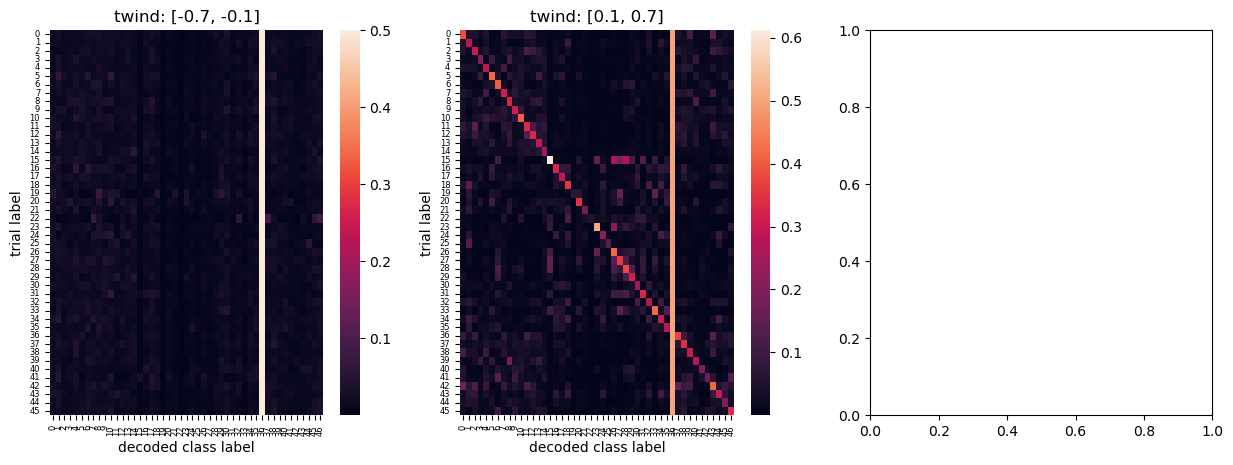

In [22]:
# Plot results
from pythonlib.tools.snstools import heatmap_mat

ncols = 3
nrows = int(np.ceil(len(list_twind)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

for ax, ind_twind in zip(axes.flatten(), range(len(list_twind))):
    heatmap_mat(resthis[:, :, ind_twind], ax, False)    
    ax.set_xlabel("decoded class label")
    ax.set_ylabel("trial label")
    ax.set_title(f"twind: {list_twind[ind_twind]}")



#### plot after sort labels


In [23]:
# NOTE: this is written for a very specific expeirmetn (Novel vs. orig prims)_.

In [24]:
def F(x):
    if "novelprim" in x:
        return f"2{x}"
    elif "presamp" in x:
        return f"3{x}"
    else:
        return f"1{x}"


['1Lcentered-86-1.6-0.0', '1Lcentered-86-3.1-1.6', '1Lcentered-86-3.1-4.7', '1Lcentered-86-4.7-0.0', '1V-83-1.8-1.3', '1V-83-4.5-5.0', '1V-83-6.0-0.3', '1arcdeep-85-2.0-1.2', '1arcdeep-85-4.4-5.1', '1arcdeep-85-5.9-0.4', '1circle-67-6.0-0.4', '1line-79-2.4-5.5', '1line-79-3.1-0.0', '1line-79-3.9-0.8', '1line-79-4.7-1.6', '2novelprim221452017317-91-5.3-1.4', '2novelprim290480141634-125-4.1-0.1', '2novelprim302322405581-125-4.6-0.1', '2novelprim307096595122-125-3.3-1.5', '2novelprim347277860216-130-4.9-0.9', '2novelprim417458511209-102-4.5-2.3', '2novelprim419260059546-115-3.8-2.3', '2novelprim420969415309-102-3.4-1.7', '2novelprim495912188195-130-4.6-2.2', '2novelprim567420570629-90-3.4-0.9', '2novelprim570674149421-115-3.3-2.2', '2novelprim625505027794-130-5.3-1.5', '2novelprim646591468043-75-5.3-0.7', '2novelprim65385831858-75-5.3-0.1', '2novelprim675463345033-91-5.3-0.1', '2novelprim677917180851-125-4.5-0.7', '2novelprim716304867517-130-5.3-0.9', '2novelprim902433564644-125-3.8-1.4',

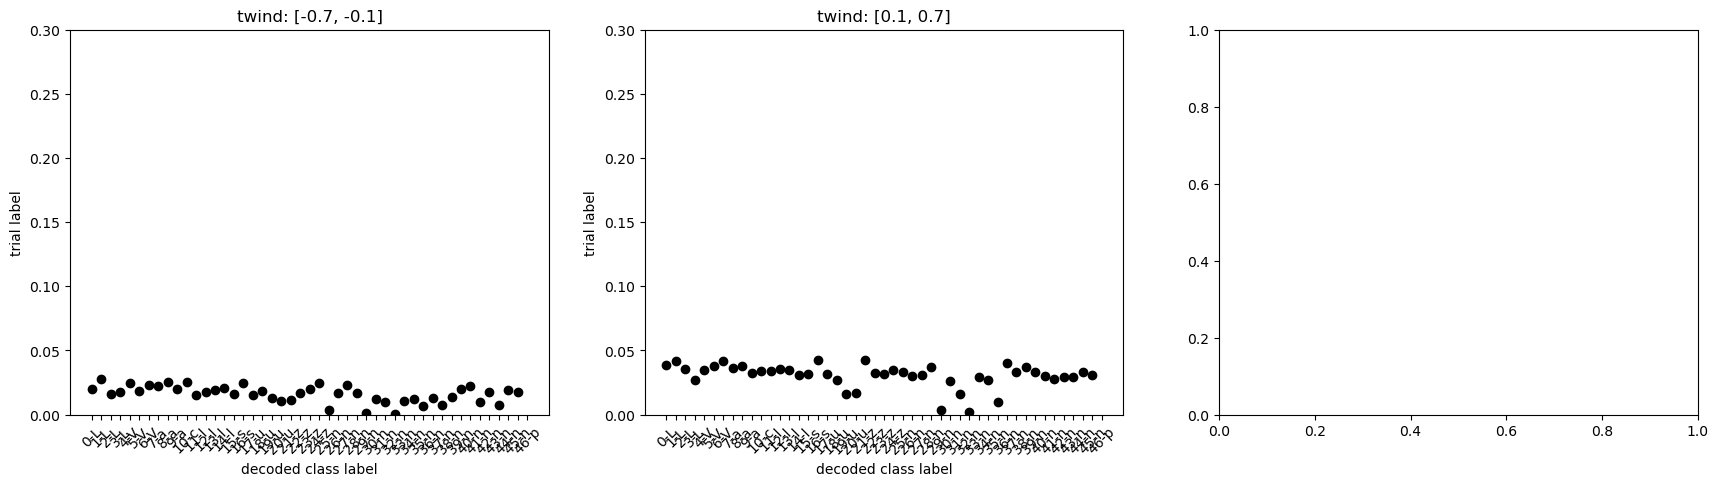

In [25]:
labs_rows = [x[0] for x in grpdict.keys()]
labs_for_sorting = [F(x) for x in labs_rows]
inds = np.argsort(labs_for_sorting)
print(labs_for_sorting)
res_sorted = resthis[inds, :, :]
labs_rows_sorted = [labs_rows[i] for i in inds]

labs_cols = mlb.classes_
labs_for_sorting = [F(x) for x in labs_cols]
print(labs_for_sorting)
inds = np.argsort(labs_for_sorting)
res_sorted = res_sorted[:, inds, :]
labs_cols_sorted = [labs_cols[i] for i in inds]

from pythonlib.tools.snstools import heatmap_mat

ncols = 3
nrows = int(np.ceil(len(list_twind)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*7, nrows*5))

for ax, ind_twind in zip(axes.flatten(), range(len(list_twind))):
    if False:
        heatmap_mat(res_sorted[:, :, ind_twind], ax, False, zlims=(0, 0.3))    
        ax.set_xlabel("decoded class label")
        ax.set_ylabel("trial label")
        ax.set_title(f"twind: {list_twind[ind_twind]}")
    else:
        res_vec = np.mean(res_sorted[:, :, ind_twind], axis=0)
        xlab = [f"{i}-{x[:1]}" for i, x in enumerate(labs_cols_sorted)]
        ax.plot(xlab, res_vec, "ok")

        from pythonlib.tools.plottools import rotate_x_labels
        rotate_x_labels(ax)
        ax.set_xlabel("decoded class label")
        ax.set_ylabel("trial label")
        ax.set_title(f"twind: {list_twind[ind_twind]}")
        ax.set_ylim([0, 0.3])

        

# Older methods

### Extract single trial results

In [26]:

# PARAMS
var_decode = "seqc_0_shape"
bregion = "PMv"
twind = (-0.4, 0.6)

In [27]:

a = DFRES["var_decode"]==var_decode
b = DFRES["bregion"]==bregion
c = DFRES["twind"]==twind
dfthis = DFRES[a & b & c]

times = dfthis["time"]
import numpy as np
labels_predicted = np.stack(dfthis["labels_predicted"]).T # (ntrials, ntimes)
labels_test = np.stack(dfthis["labels_test"]).T
conf_scores = np.transpose(np.stack(dfthis["conf_scores"]), [1,0,2]) # (ntrials, ntimes, nclasses)

# score each time bin as correct or incorrect
labels_correct = (labels_predicted == labels_test).astype(int)


NameError: name 'DFRES' is not defined

In [ ]:
# For each trial, what was its label
assert np.all(np.diff(labels_test, axis=1))==0, "otherwise cant do next step."
labels_each_trial = labels_test[:,0]
labels_orig = PA_test.Xlabels["trials"][var_decode].tolist()
assert len(labels_orig)==len(labels_each_trial)

map_labint_to_trials = {}
map_labint_to_laborig = {}
labels_unique = np.unique(labels_each_trial)
for lab in labels_unique:
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT
    map_labint_to_trials[lab] = inds_this_label

    # Map it back to original label
    lab_orig = PA_test.Xlabels["trials"][var_decode][inds_this_label].unique()
    assert len(lab_orig)==1
    map_labint_to_laborig[lab] = lab_orig[0]

map_trial_to_labint = {i:labint for i, labint in enumerate(labels_each_trial)}
print(map_labint_to_laborig)    
map_laborig_to_labint = {}
for labint, laborig in map_labint_to_laborig.items():
    assert laborig not in map_laborig_to_labint
    map_laborig_to_labint[laborig] = labint

import matplotlib.pyplot as plt
from pythonlib.tools.plottools import makeColors
pcols = makeColors(len(map_labint_to_laborig))
map_trial_to_seq = {}
map_trial_to_seq_ints = {}
for i, seq in enumerate(PA_test.Xlabels["trials"].loc[:, ["seqc_0_shape", "seqc_1_shape"]].values.tolist()):
    map_trial_to_seq[i] = (tuple(seq))
    map_trial_to_seq_ints[i] = [map_laborig_to_labint[s] if s in map_laborig_to_labint else s for s in seq]


In [ ]:
# Pick n random trials
import random
n=  9
trials_all = list(range(len(map_trial_to_labint)))
trials = random.sample(trials_all, n)
ncols = 3
nrows = int(np.ceil(len(trials)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), sharex=True, sharey=True)

for tr, ax in zip(trials, axes.flatten()):
    
    # ax = axes.flatten()[0]
    lab_pred = labels_predicted[tr,:]
    # lab_corr = labels_correct[trial,:]
    # lab_test = labels_test[trial,:]
    # ax.plot(times, lab_pred, "-ok"),
    # ax.plot(times, lab_test, "-r")
    
    # for each class, plot its time series
    for labint in map_labint_to_laborig:
        cs_this_lab = conf_scores[tr, :, labint].squeeze()
        
        ax.plot(times, cs_this_lab, label=labint, color=pcols[labint])
        # ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "-", color=pcols[labint], linewidth=4)
        ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "s", color=pcols[labint])
    
    ax.axvline(0, color="k", alpha=0.5)
    ax.set_title(f"{var_decode}={map_trial_to_labint[tr]}", color=pcols[map_trial_to_labint[tr]])
    ax.set_xlabel(f"seq: {map_trial_to_seq_ints[tr]}")
    ax.legend()
        

In [ ]:
# For each class label, collect all trials for which that is the correct label, and overlap

labels_unique = np.unique(labels_each_trial)
ncols = 3
nrows = int(np.ceil(len(labels_unique)/ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

for lab, ax in zip(labels_unique, axes.flatten()):
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT 
    ax.plot(times, labels_predicted[inds_this_label, :].T, "-ok", alpha=0.05)
    ax.set_title(lab)
    
    

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

ax = axes.flatten()[0]
ax.plot(times, labels_correct.T, "xk", alpha=0.003);

In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_cross_time